### Working with Time Series Data

#### Dates and TImes in Python

##### Native Python dates and times: datetime dateutil

In [2]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
# parsing from variety of string firmats
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [10]:
date.strftime('%A') # the %A is python standard, more notes in datetime

'Saturday'

other packages include `pytz` (for tough stuffs and time zone ish) and `dateutil`

However, these built-ins don't scale properly

##### Typed arrays of times: NumPy's datetime64

In [12]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [13]:
# we can then carry out vectorized operations 
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

Because the datetime64 object is limited to 64-bit precision, the
range of encodable times is $ 2^{64} $ times the fundamental unit. This implies a trade-off between time resolution and span

NumPy will infer the desired unit from the input

In [14]:
# e.g day-based
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [19]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

We can force a unit

In [20]:
#e.g nanoseconds
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

#### Dates and times in Pandas: Best of both worlds

In [21]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [22]:
date.strftime('%A')

'Saturday'

In [23]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time-Series: Indexing by Time

In [24]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [25]:
data['2014-07-04': '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [26]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data structure

In [27]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])
# yields index by default
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [28]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [29]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: pd.date_range()

In [30]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range('2015-07-03', periods=8) # specifying period inplace of endpoint

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# altering the spacing woht freq argument
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [34]:
pd.date_range('2015-07-03', periods=8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [35]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

Note the monthly , quarterly, and annual freuencies are all marked at the end of the specified period.
Adding `S` suffix marks it insead at the beginning

In [36]:
pd.date_range('2015-07-03', periods=5, freq='MS')

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

Additionally, you can change the month used to mark any quarterly or annual code
by adding a three-letter month code as a suffix:
 - Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
 - A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.
In the same way, you can modify the split-point of the weekly frequency by adding a
three-letter weekday code:
 - W-SUN, W-MON, W-TUE, W-WED, etc.

On top of this, codes can be combined with numbers to specify other frequencies. For
example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and
minute (T) codes as follows:

In [37]:
pd.timedelta_range(0, periods=9, freq="2H30T") #2H30T: 2hour30min

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

The short codes refer to pandas time series offsets in `pd.tserie.offsets`

In [38]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

[More details](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects)

### Resampling, Shifting, and Windowing

In [40]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='google')

In [41]:
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN
2004-08-20,50.69,54.49,50.20,54.10,NaN
2004-08-23,55.32,56.68,54.47,54.65,NaN
2004-08-24,55.56,55.74,51.73,52.38,NaN
2004-08-25,52.43,53.95,51.89,52.95,NaN


In [42]:
# just closing price
goog =  goog['Close']

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

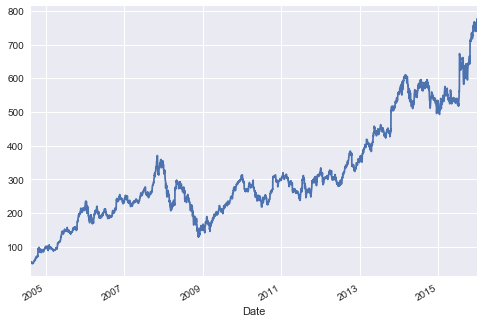

In [44]:
goog.plot();

#### Resampling and converting frequencies

The primary difference between the two is that resample() is fundamentally
a data aggregation, while asfreq() is fundamentally a data selection.

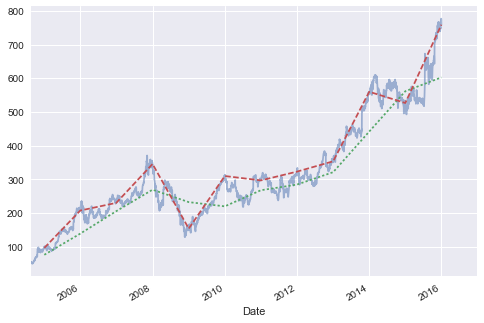

In [45]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');

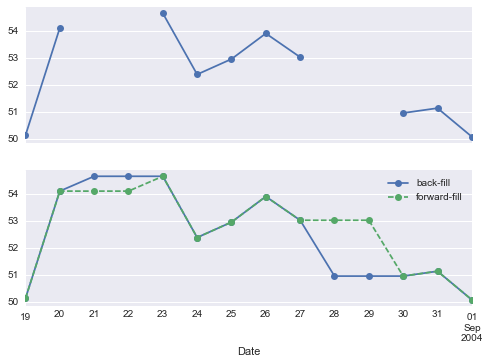

In [57]:
# we try tu resample mincluding weekends
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

ax[1].legend(["back-fill","forward-fill"]);

#### Time-shifts

`shift()` shifts the data, `tshifts()` shifts the index. shift is specified in multibles of the frequency

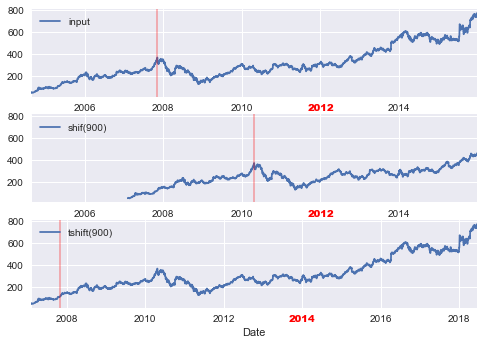

In [63]:
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shif(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy', color='red')
ax[2].axvline(local_max, alpha=0.3, color='red')

A common use of tshft and shift is in com[uting differences over time

In [64]:
# e.g Google one-year return on investment over the course of the dataset

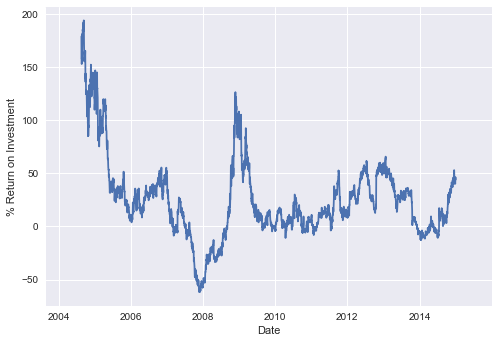

In [65]:
ROI =  100 * (goog.tshift(-365)/goog-1)
ROI.plot()
plt.ylabel('% Return on Investment')

#### Rolling windows

using the `rolling` method of the series, returns a view similar to what groupby does; no computatiion is done on data until a call to an aggregation takes place

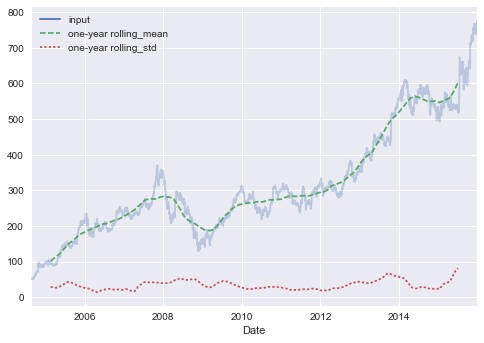

In [77]:
# one year centred rolling mean
rolling = goog.rolling(365, center=True) 

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [78]:
data.iloc[400:410]

,input,one-year rolling_mean,one-year rolling_std
Date,,,
2005-09-23,157.52,161.591425,37.132738
2005-09-24,157.52,161.846712,36.955909
2005-09-25,157.52,162.102000,36.776452
2005-09-26,156.98,162.362603,36.597437
2005-09-27,156.81,162.630521,36.428343
2005-09-28,152.85,162.925288,36.271546
2005-09-29,154.66,163.209945,36.106006
2005-09-30,158.07,163.496630,35.939430
2005-10-01,158.07,163.783945,35.768473


#### [Further reading](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

#### Example: Visualizing Seattle Bicycle Counts

In [80]:
data = pd.read_csv('../Data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [81]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

data.dropna().describe()

,West,East,Total
count,42304.000000,42304.000000,42304.000000
mean,55.455560,54.647386,110.102945
std,73.980685,78.808609,138.650051
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,30.000000,28.000000,60.000000
75%,73.000000,67.000000,145.000000
max,854.000000,717.000000,1165.000000


#### Visualizing the data

In [82]:
%matplotlib inline
import seaborn; seaborn.set()

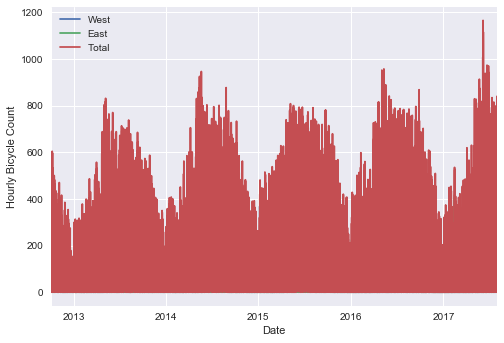

In [87]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

let's resample (weekly) as the hourly data is too dense

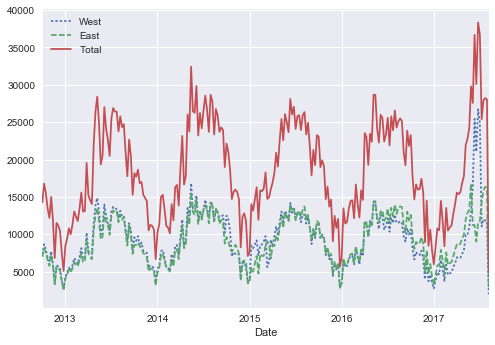

In [88]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])

we see there's an obvious seasonal trend

Also using a rolling mean

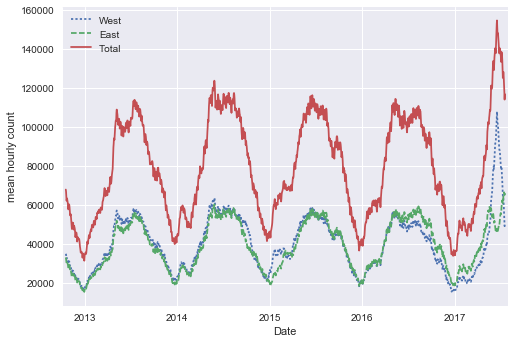

In [89]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

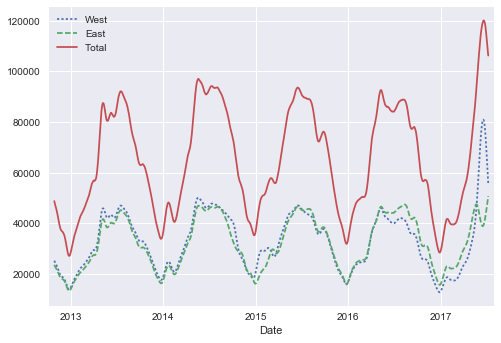

In [98]:
# note usig gaussian window requires std
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':','--','-']); # smoothing it furthre usinga gaussian window

#### Digging into the data

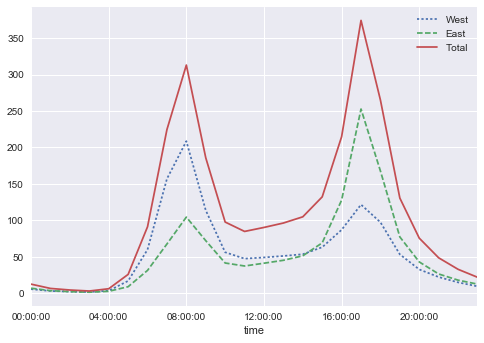

In [122]:
# vaeage traffic by time of the day
by_time = data.groupby(data.index.time).mean()

#hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[':','--','-']);


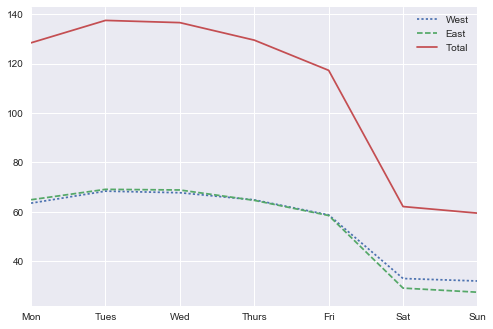

In [150]:
# by week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':','--','-']);

In [149]:
# hourly trend on e=weekdays vs weekends
weekend = np.where(data.index)

,West,East,Total
Friday,58.753060,58.506947,117.260007
Monday,63.513558,64.893022,128.406581
Saturday,33.005622,29.125827,62.131448
Sunday,32.007776,27.466744,59.474520
Thursday,64.845569,64.644345,129.489914
Tuesday,68.373796,69.098140,137.471936
Wednesday,67.730655,68.842097,136.572751


In [152]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], 
      dtype='<U7')

In [153]:
# multiple groupby
by_time = data.groupby([weekend, data.index.time]).mean()

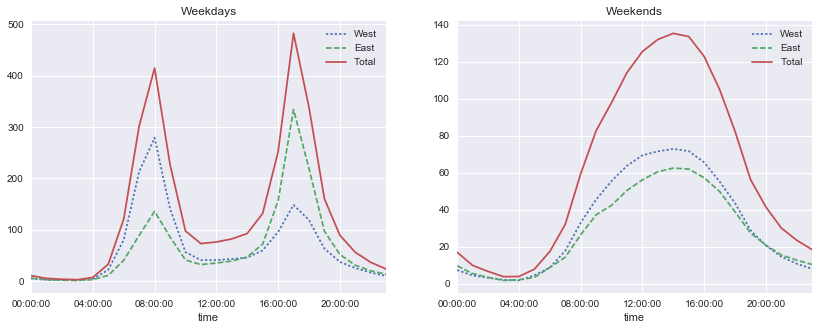

In [156]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks = hourly_ticks, style=[':','--','-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks = hourly_ticks, style=[':','--','-'])